# Problem 1

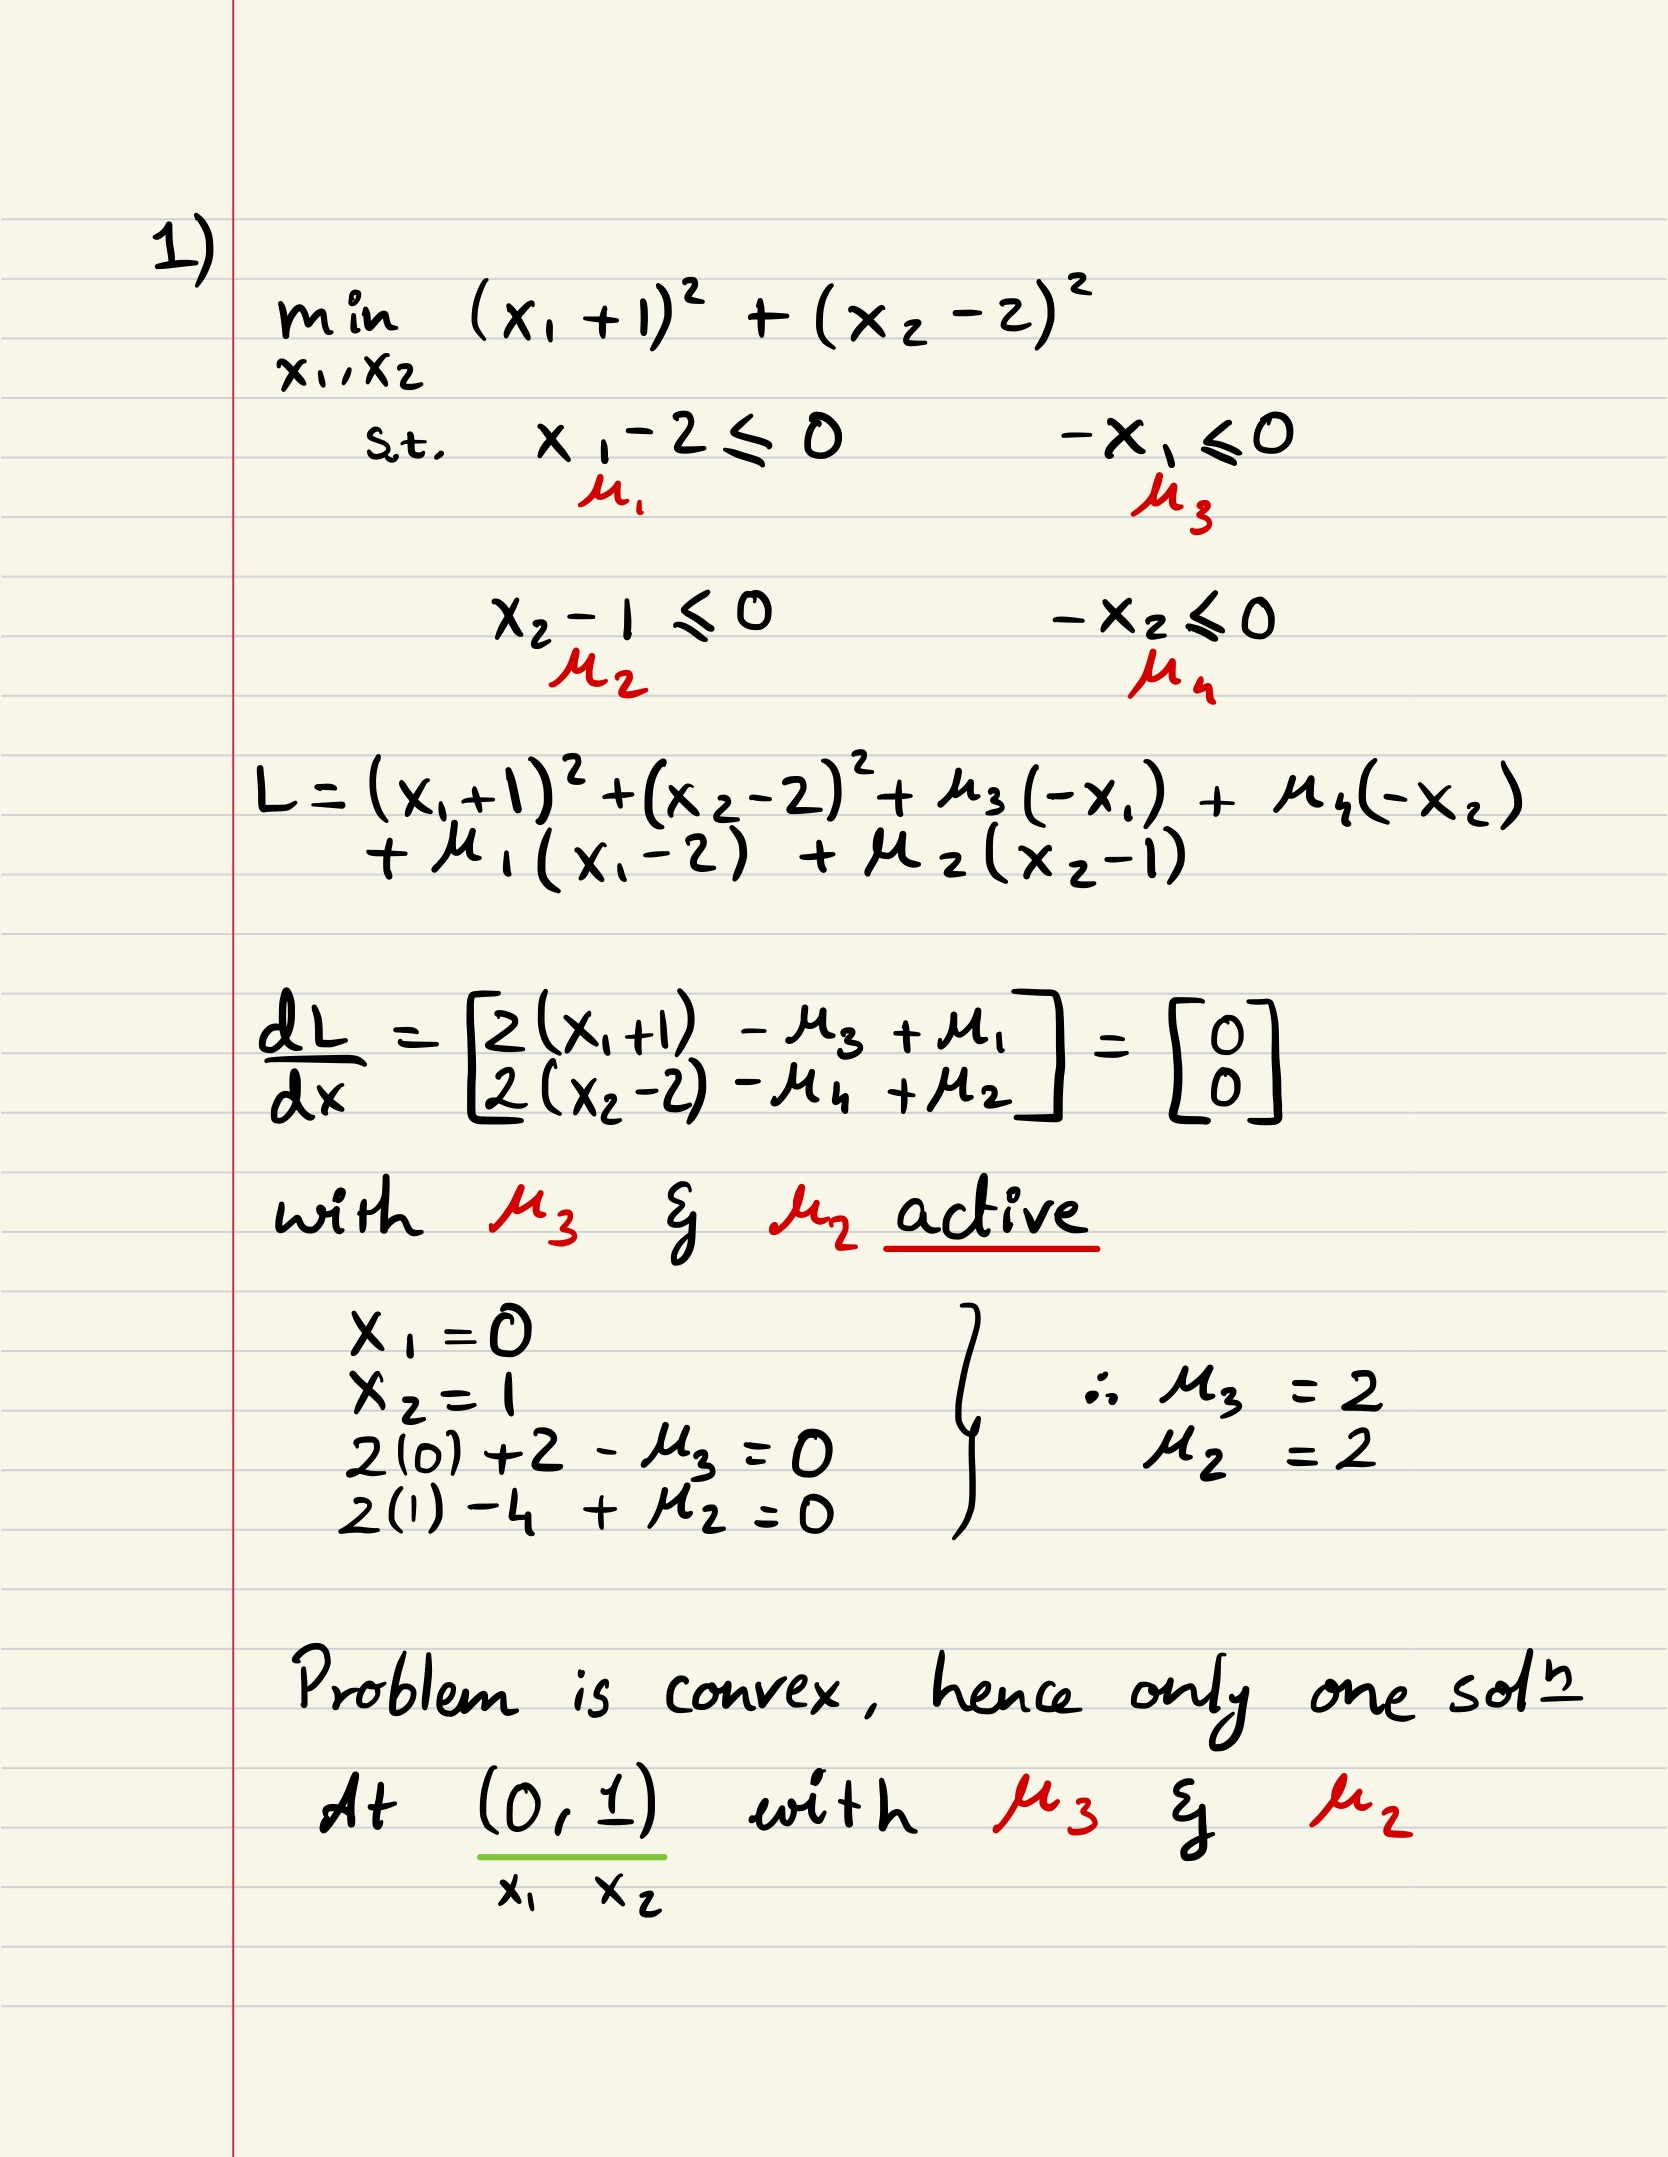

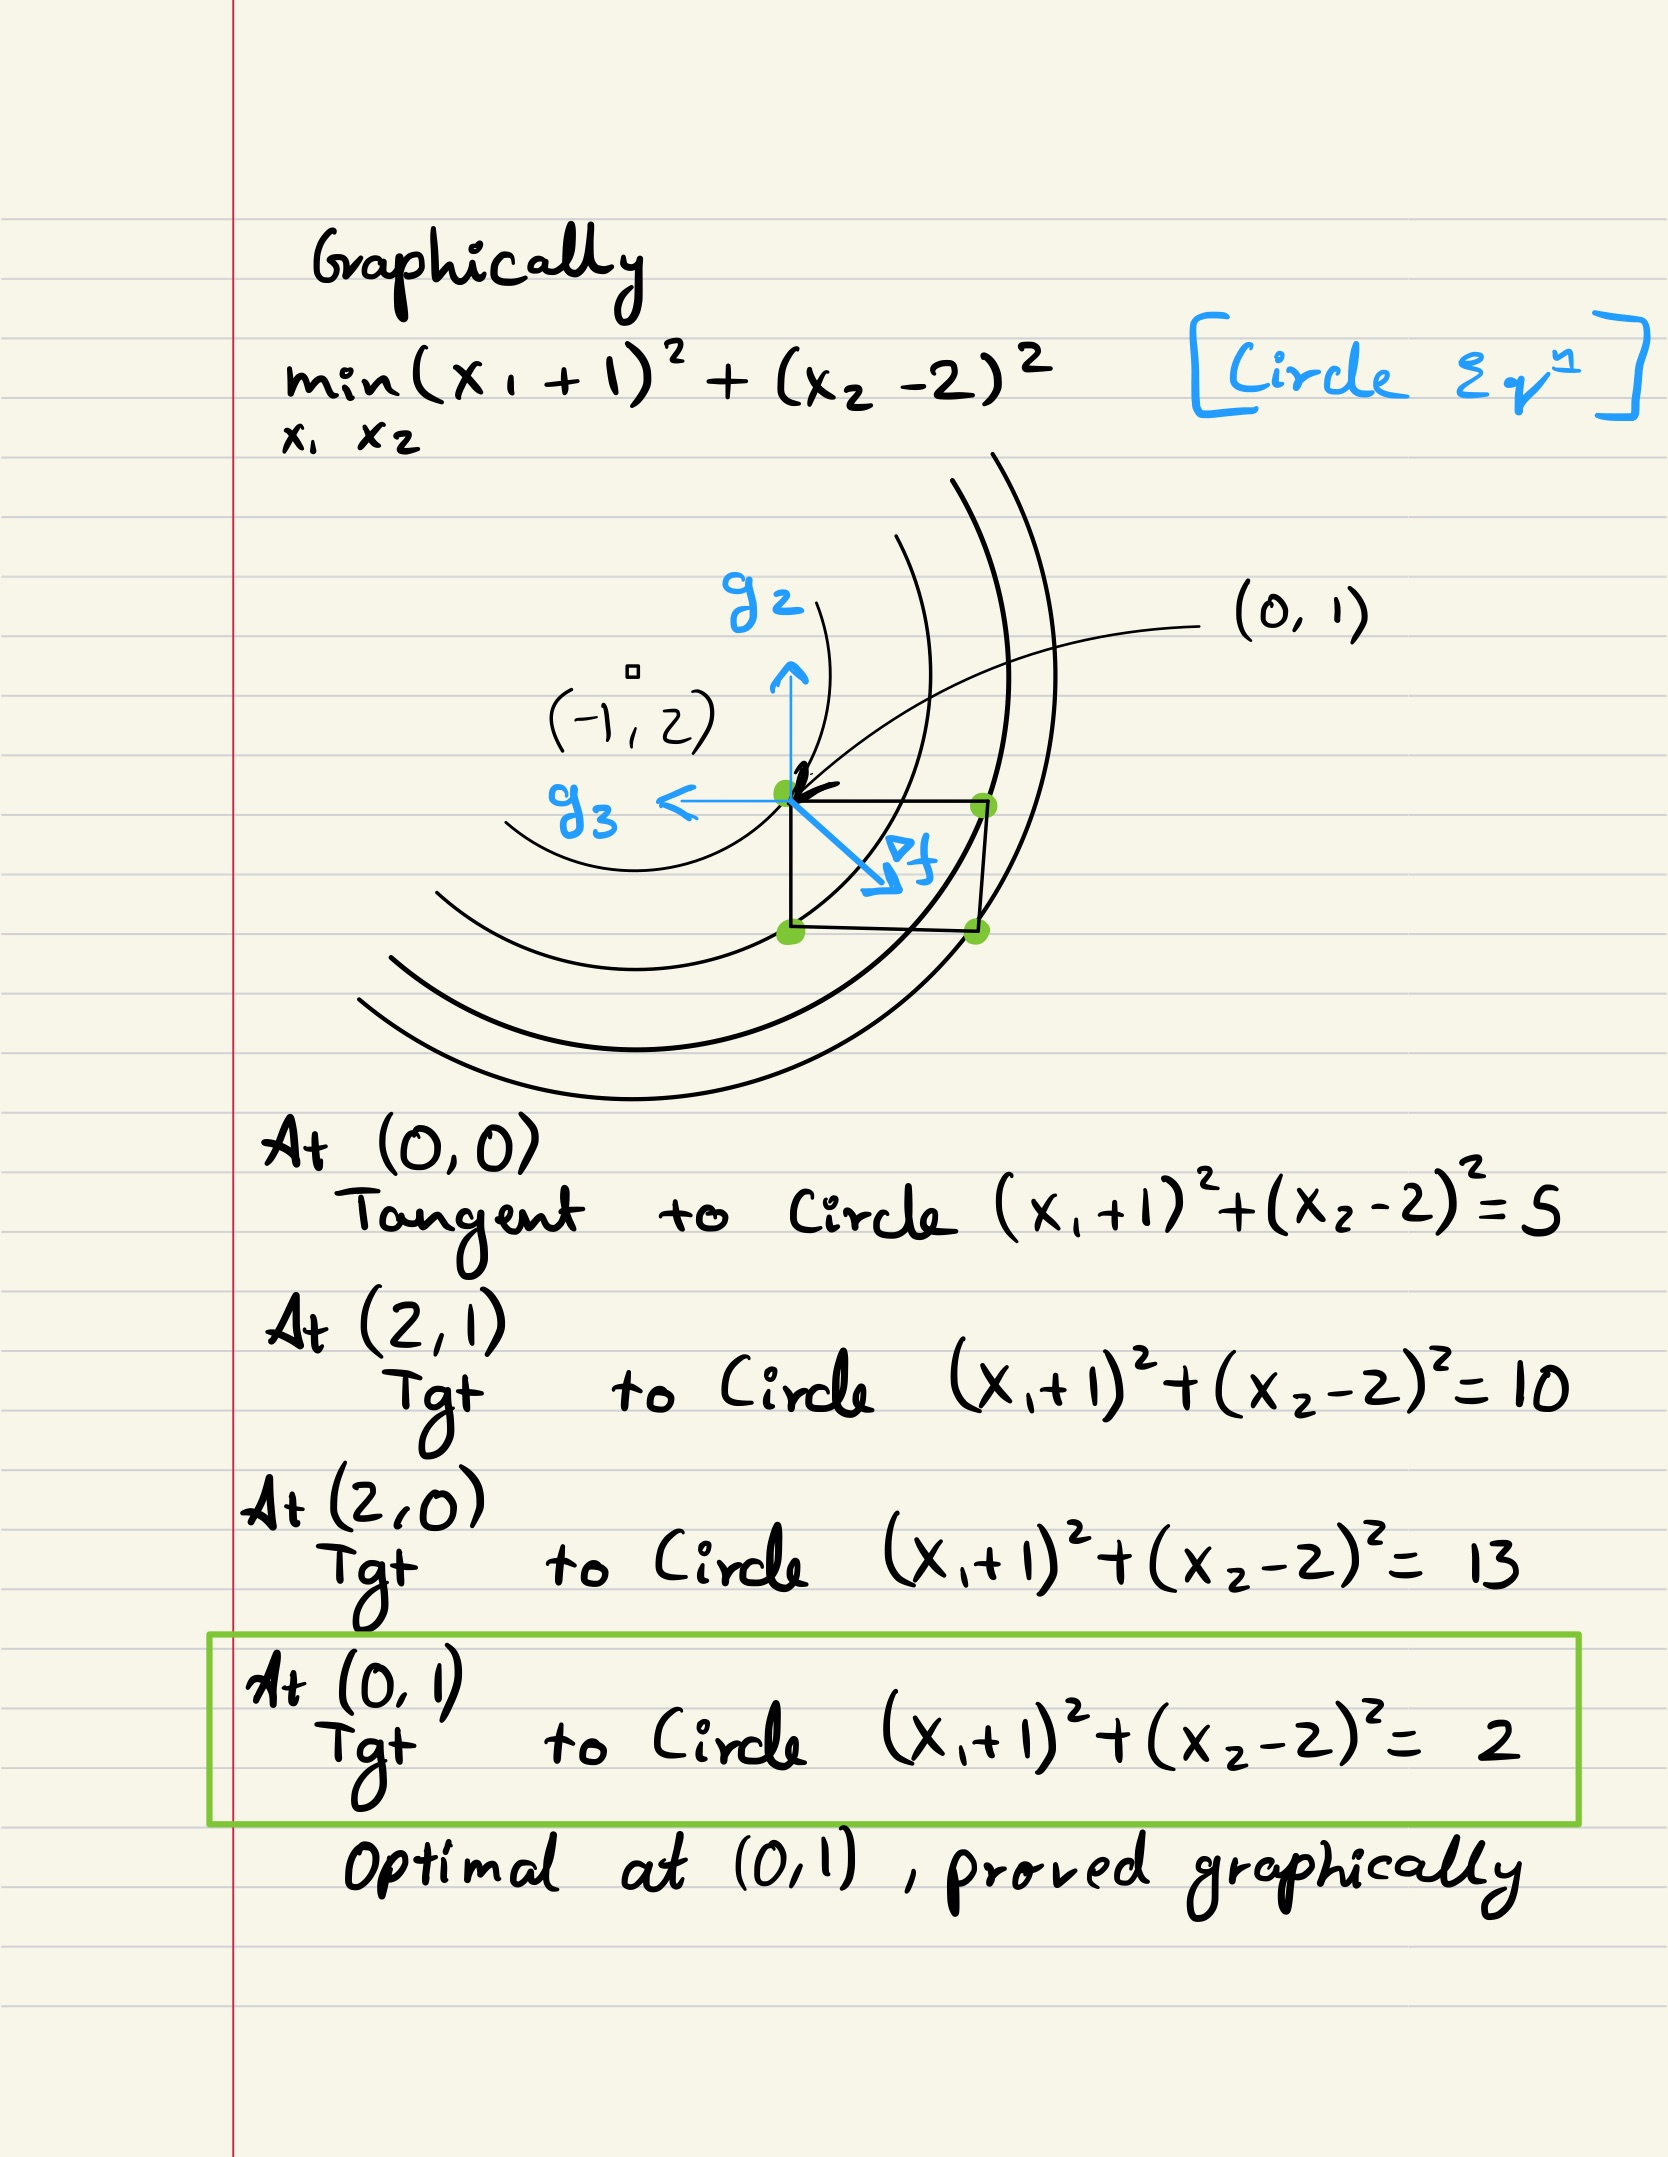

# Problem 2

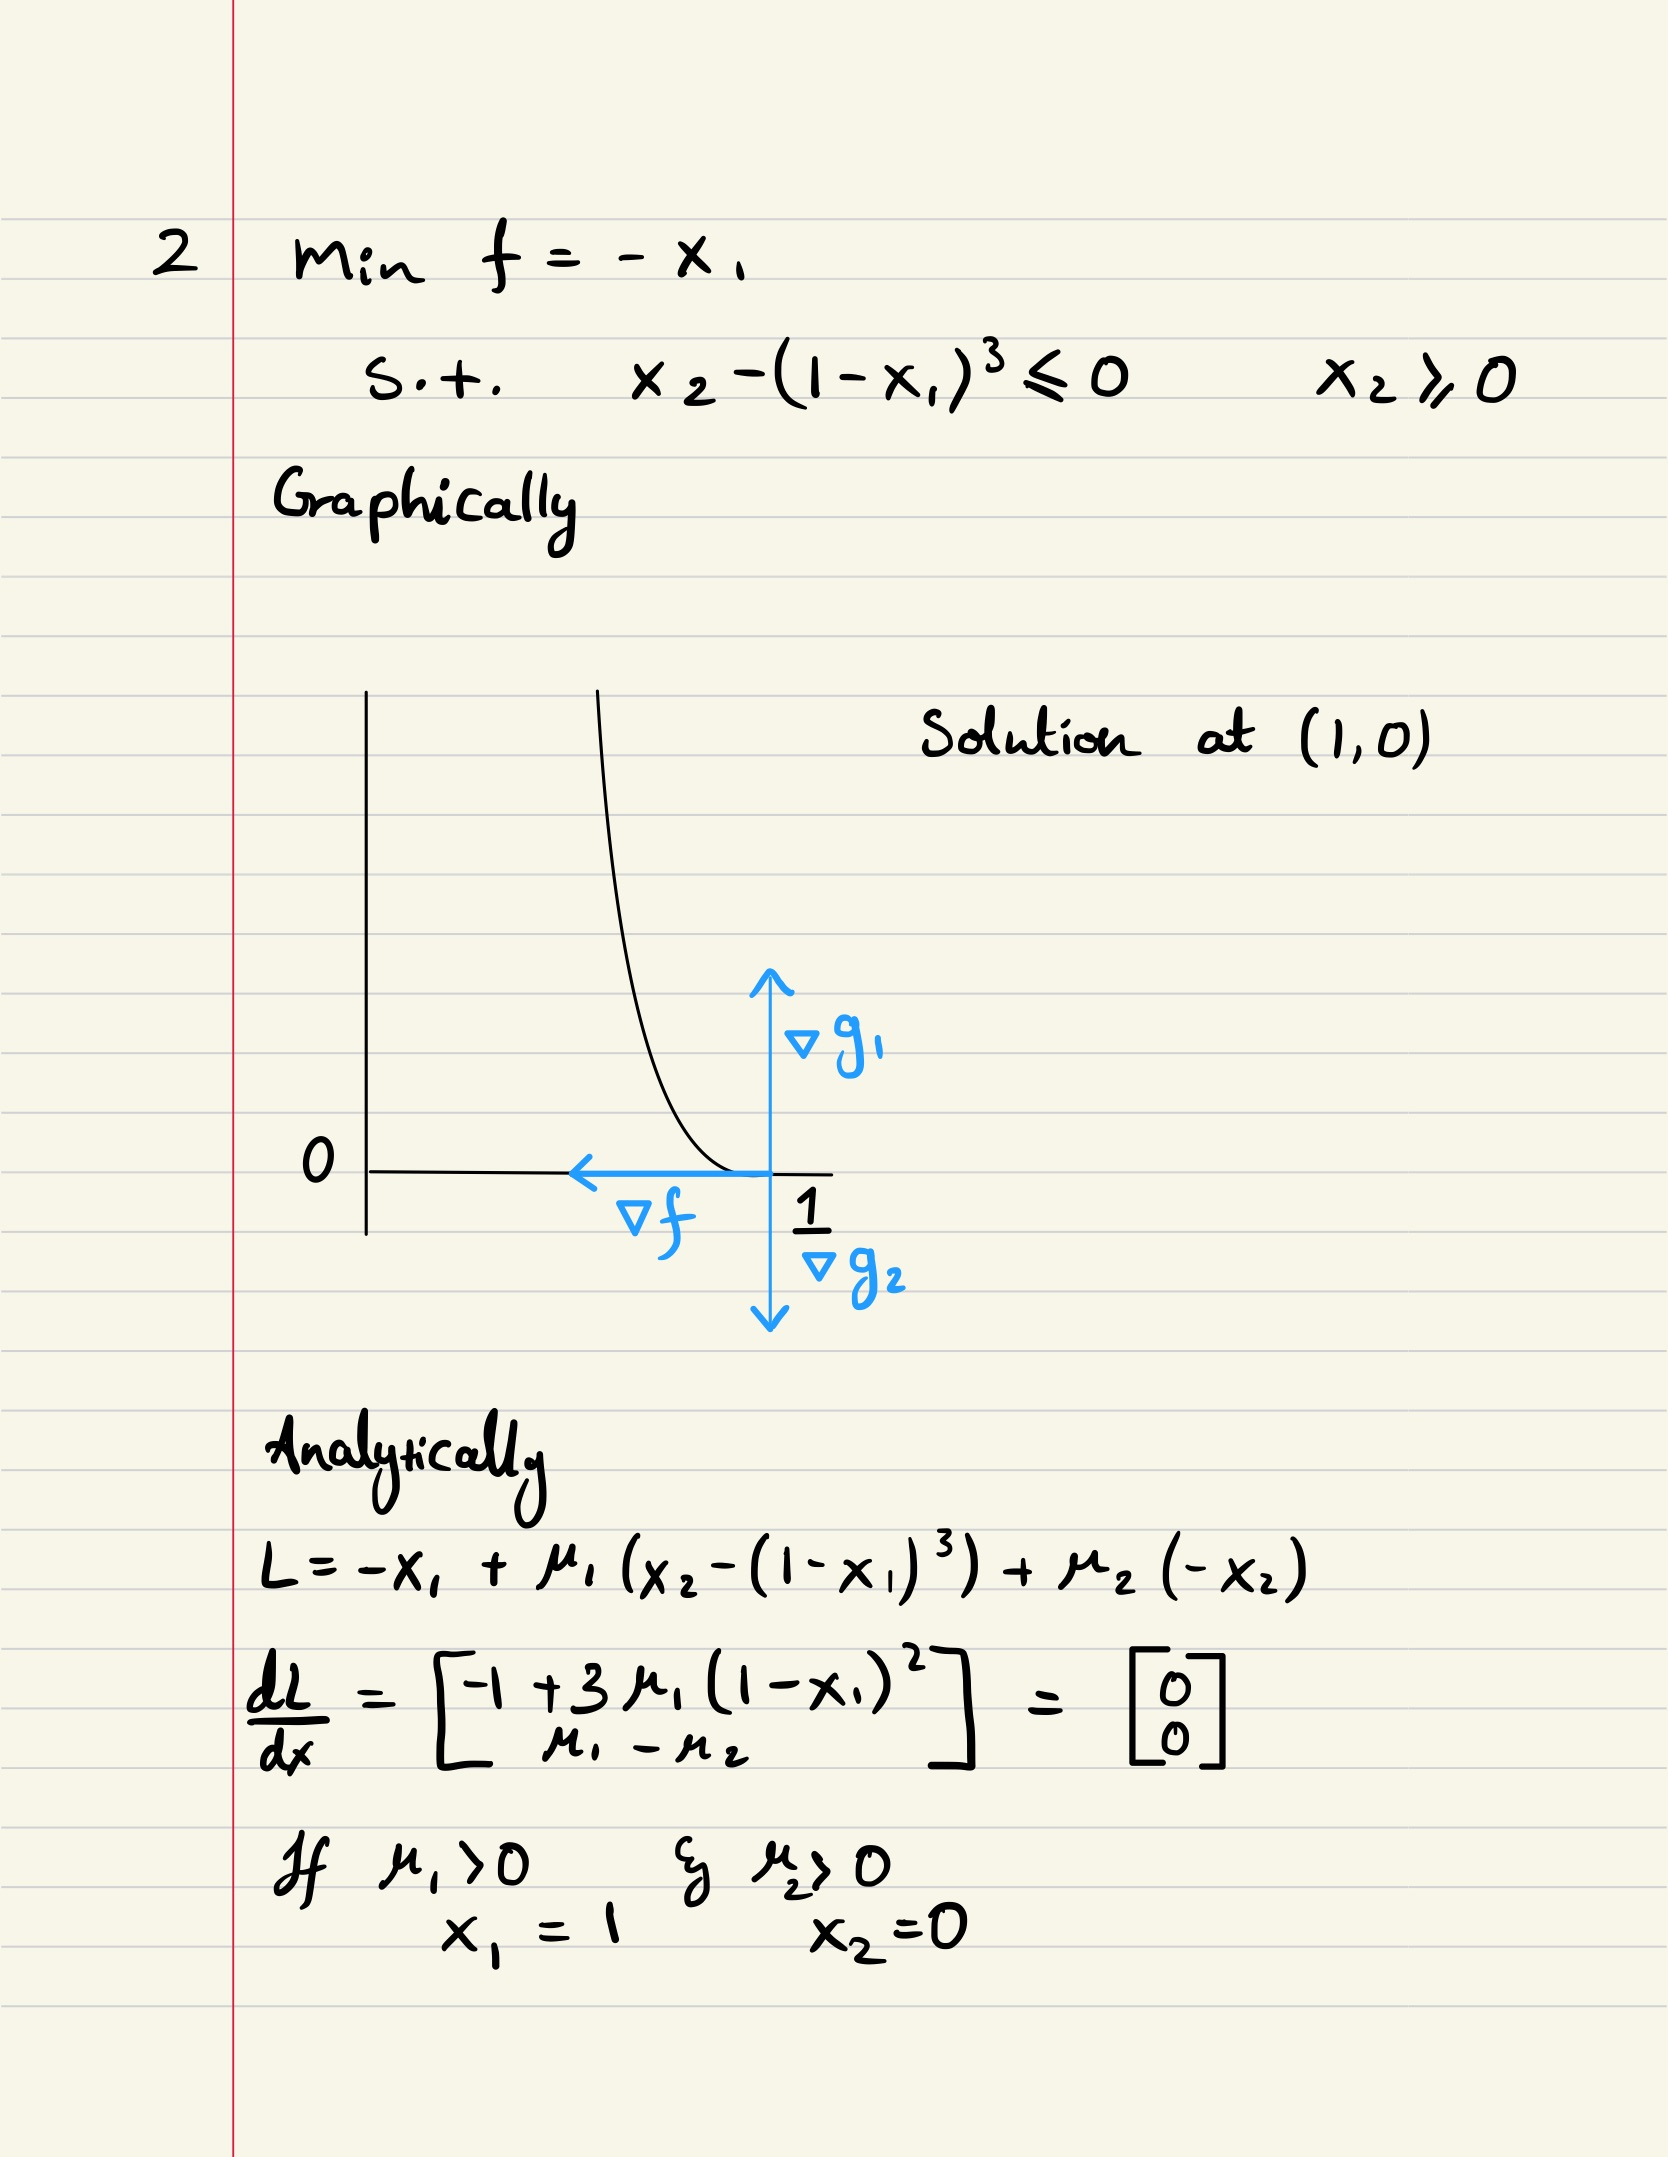

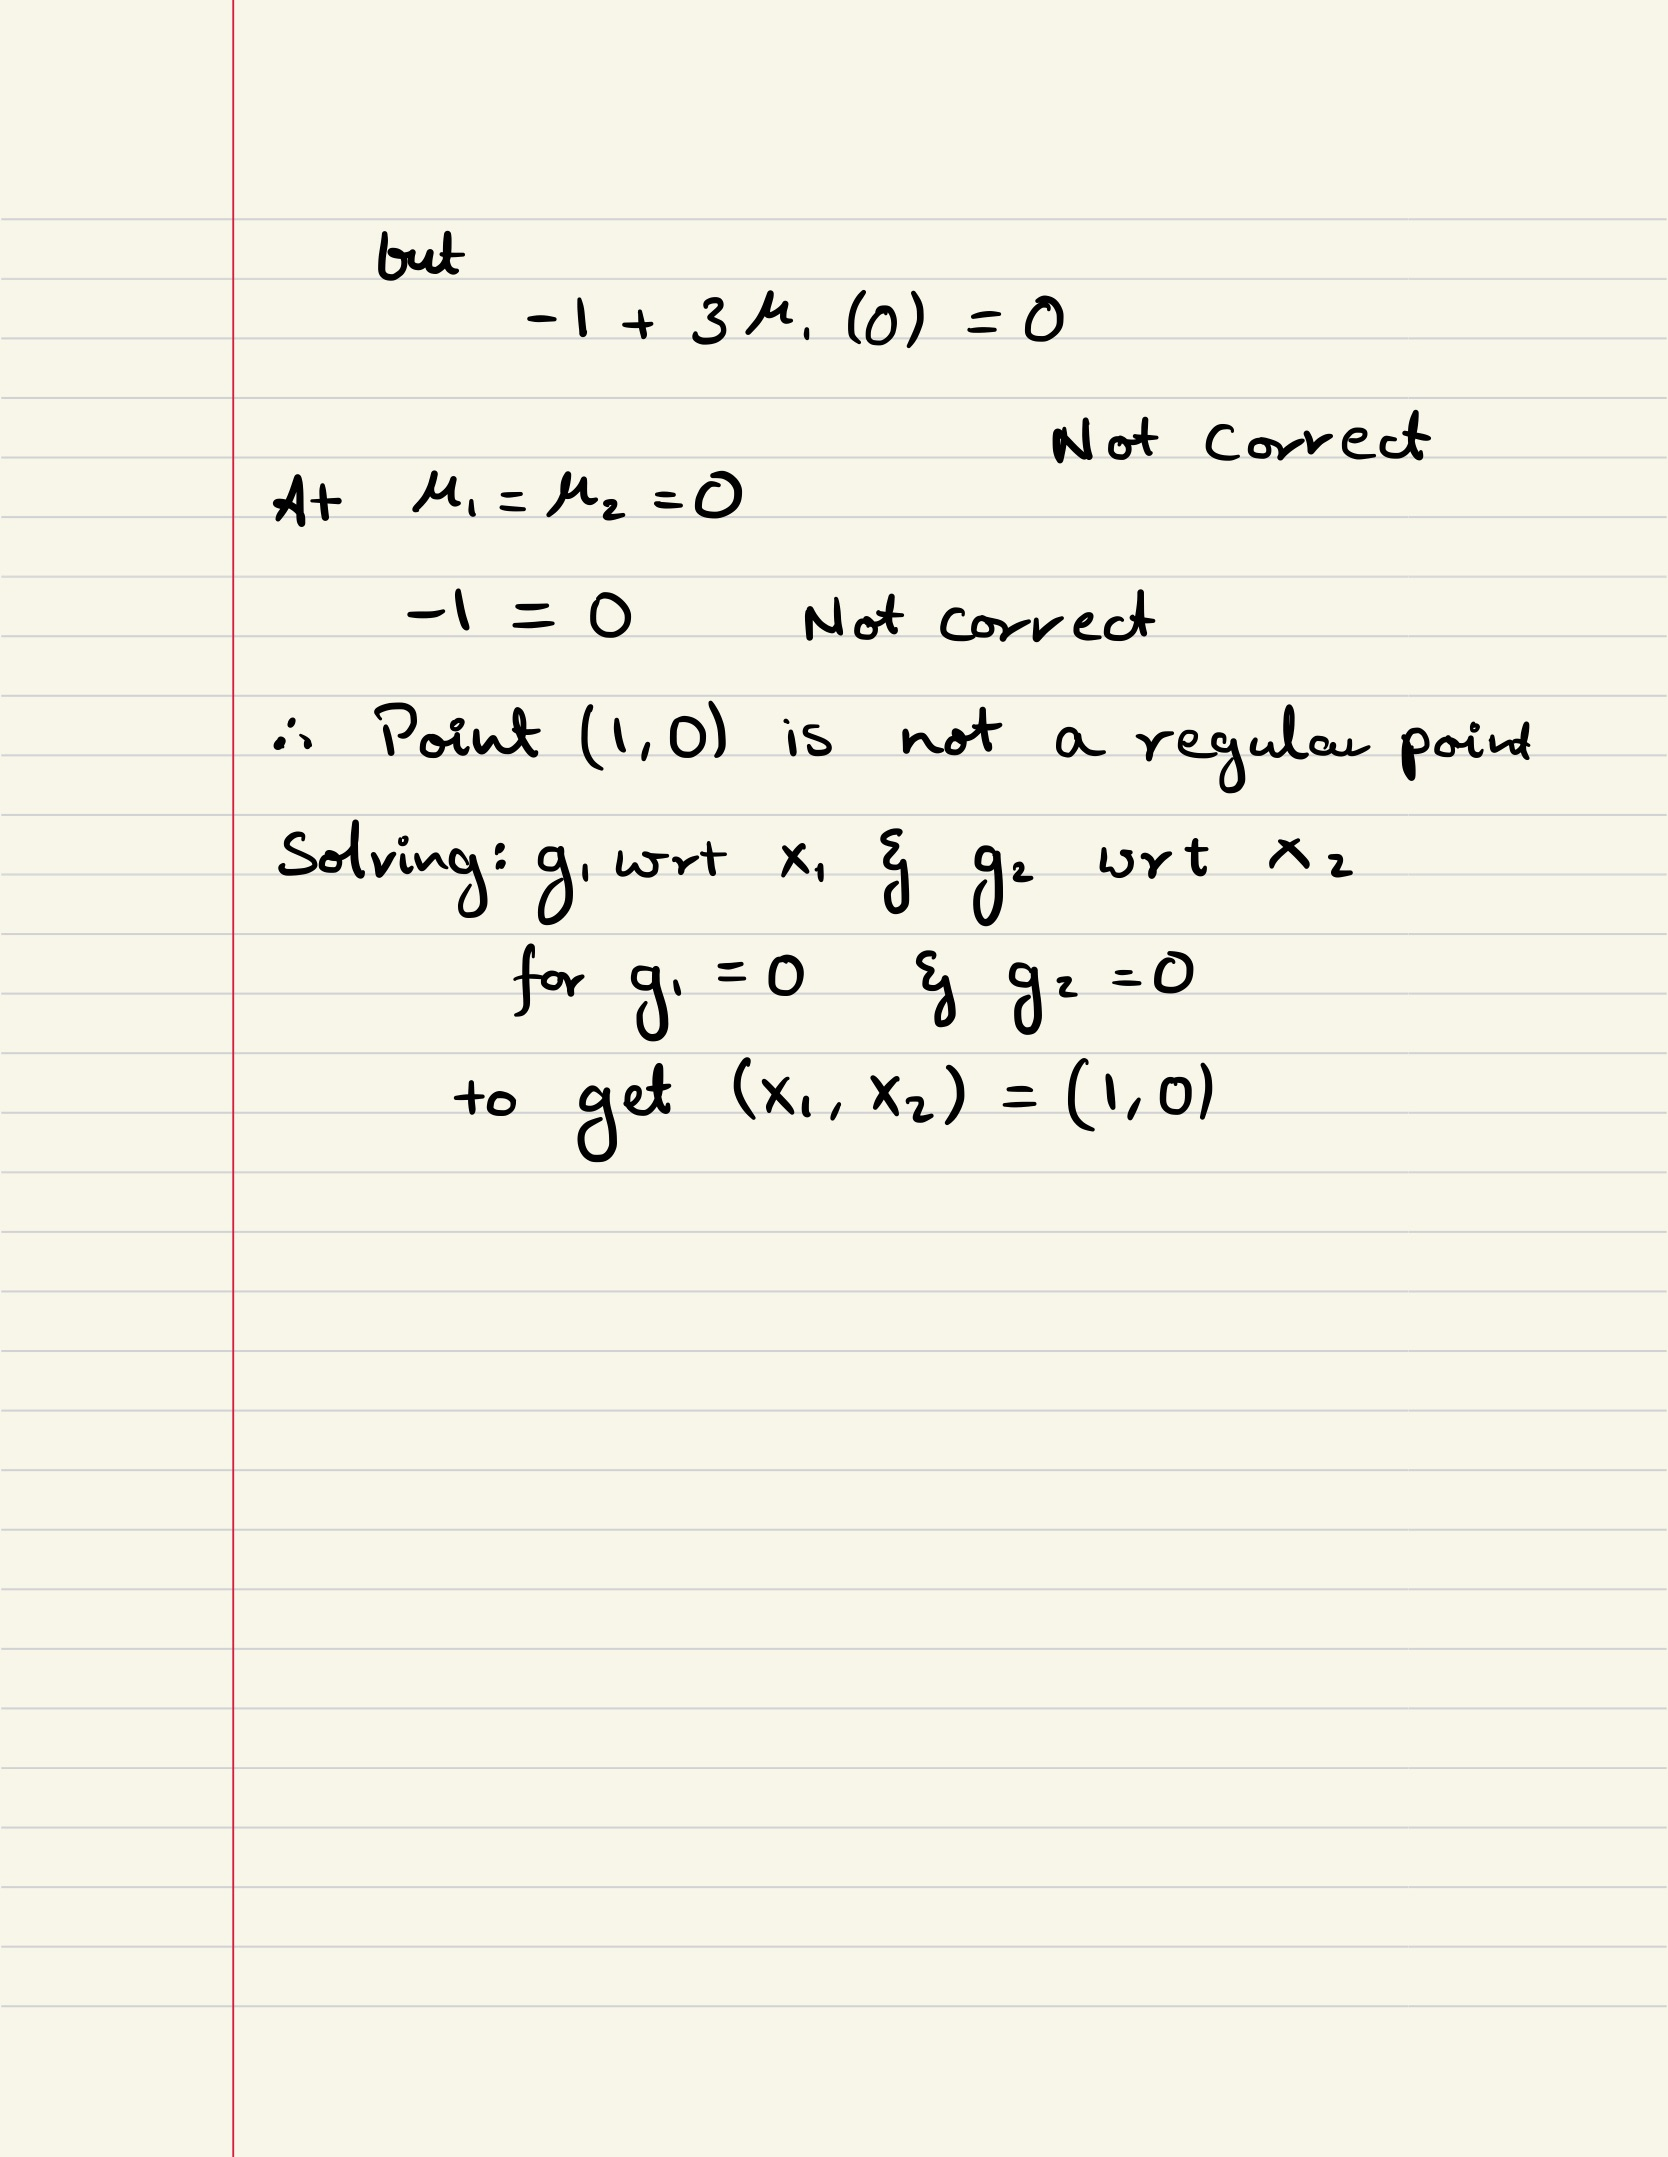

# Problem 3

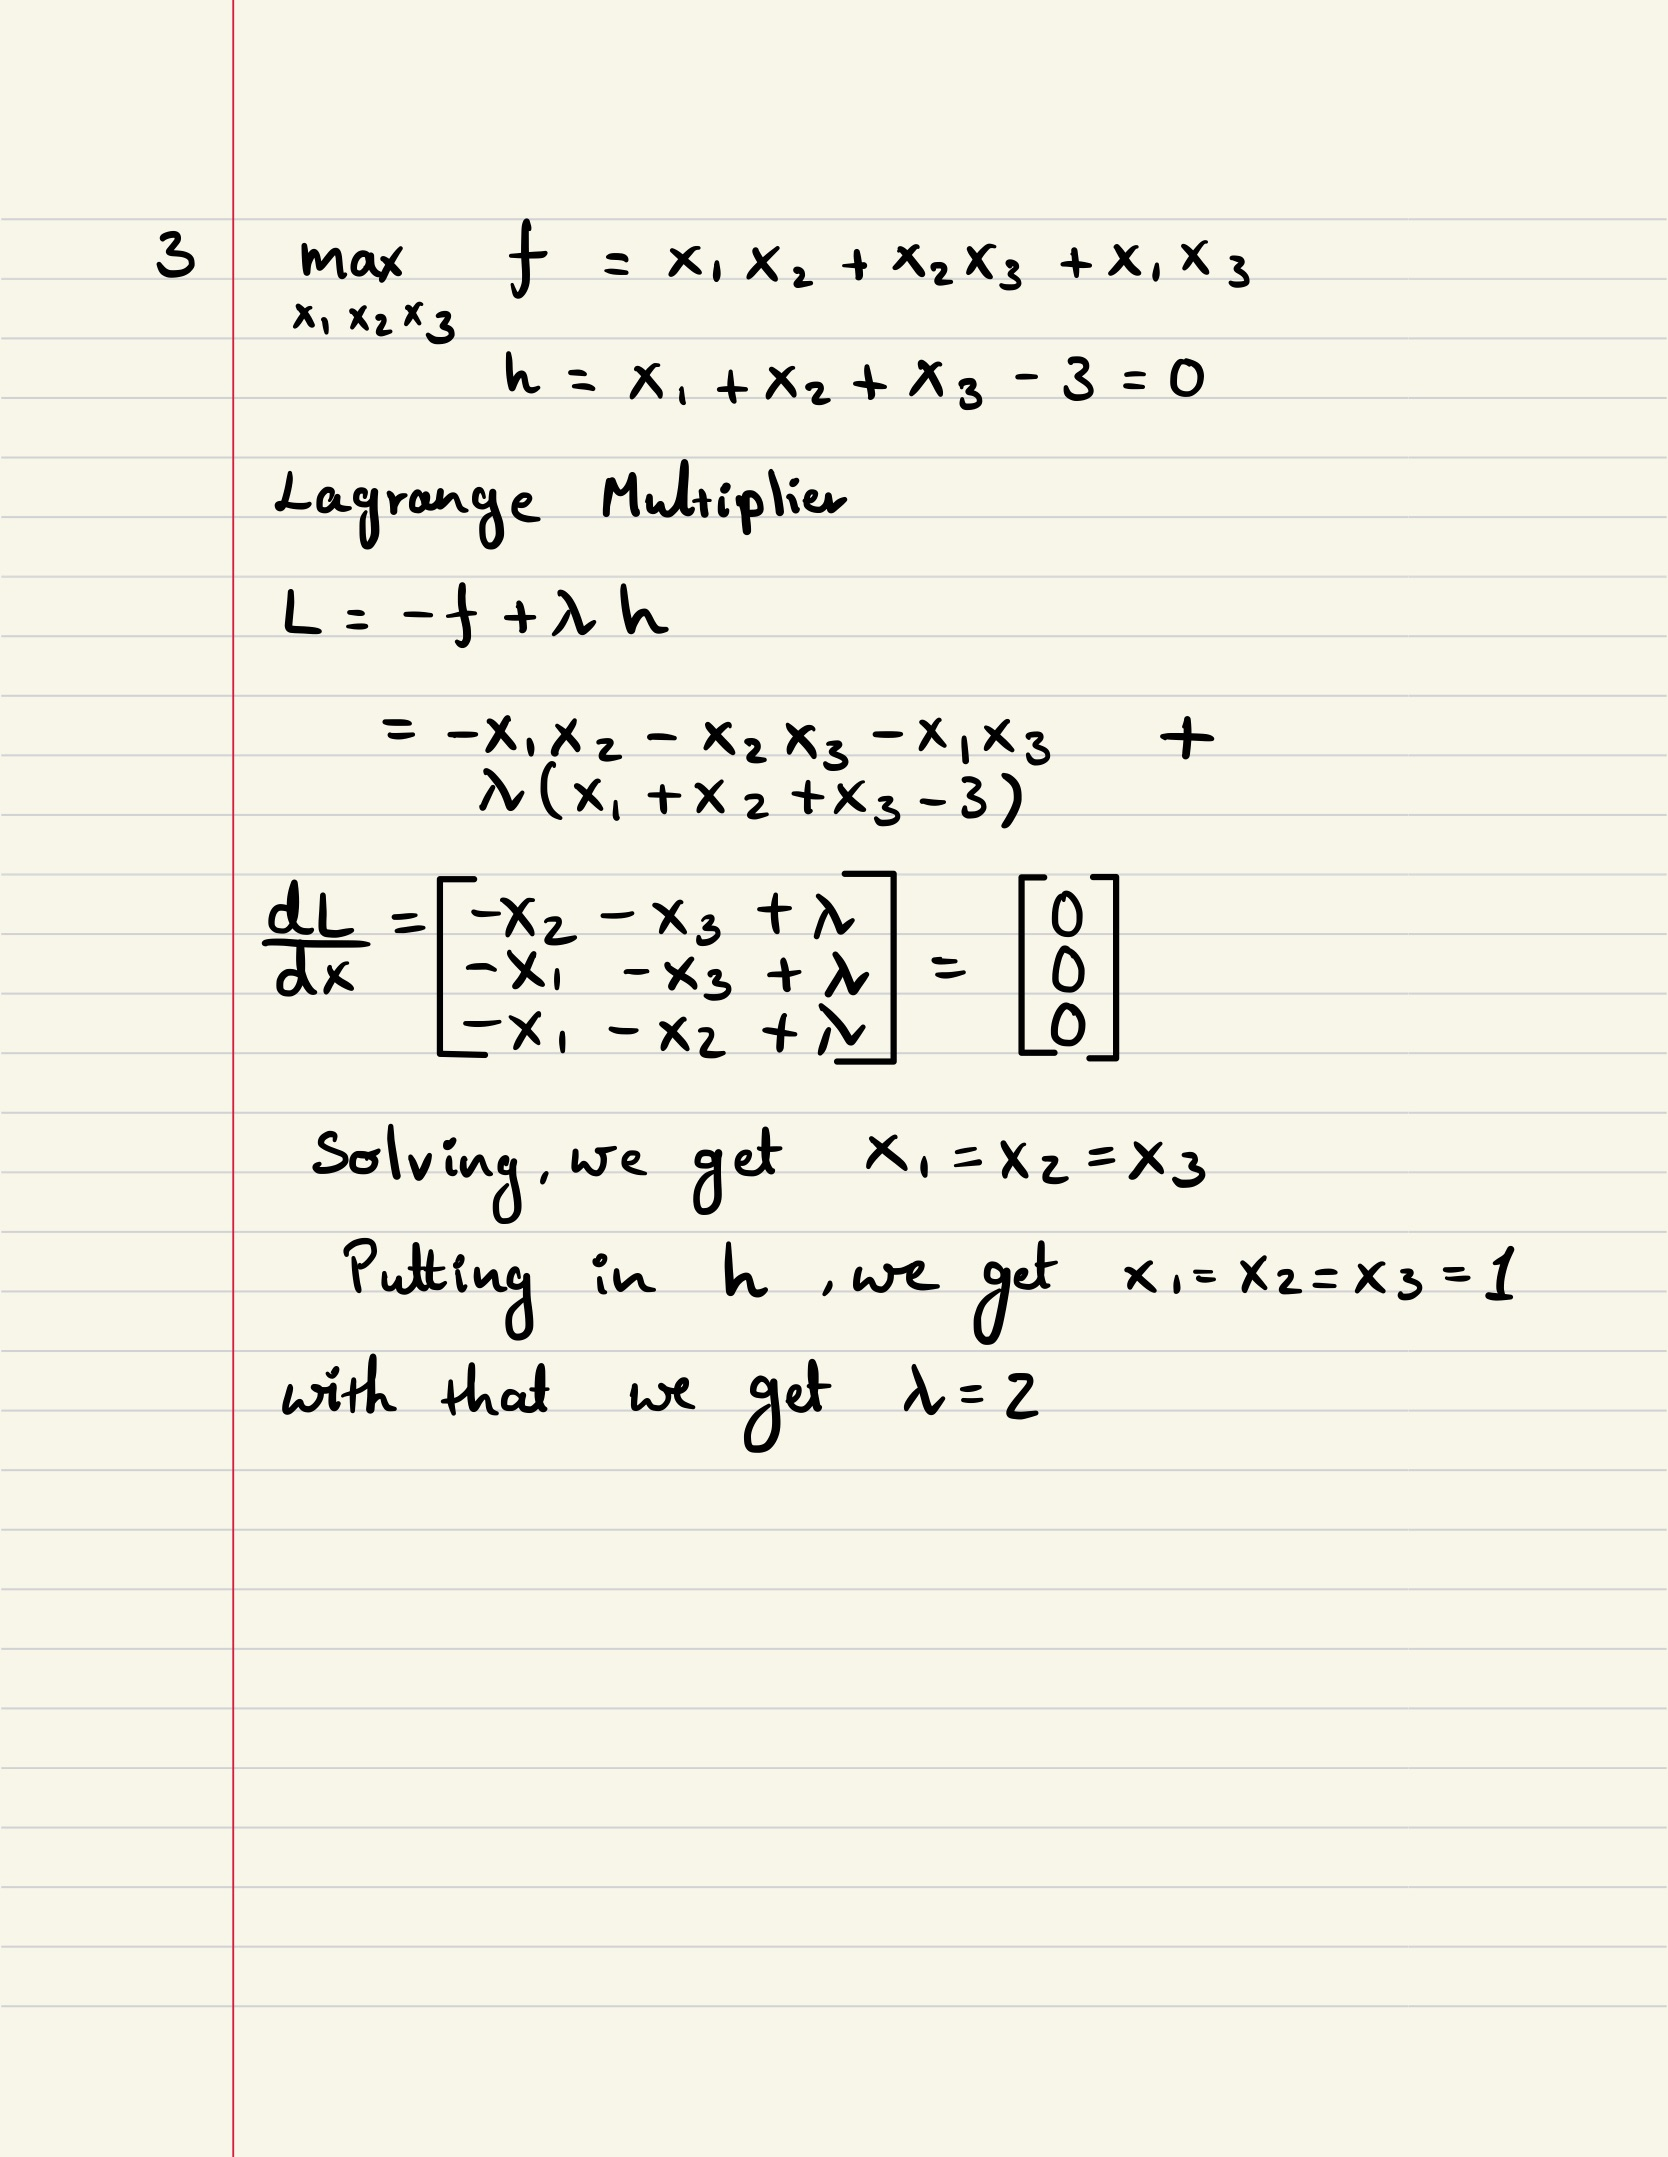

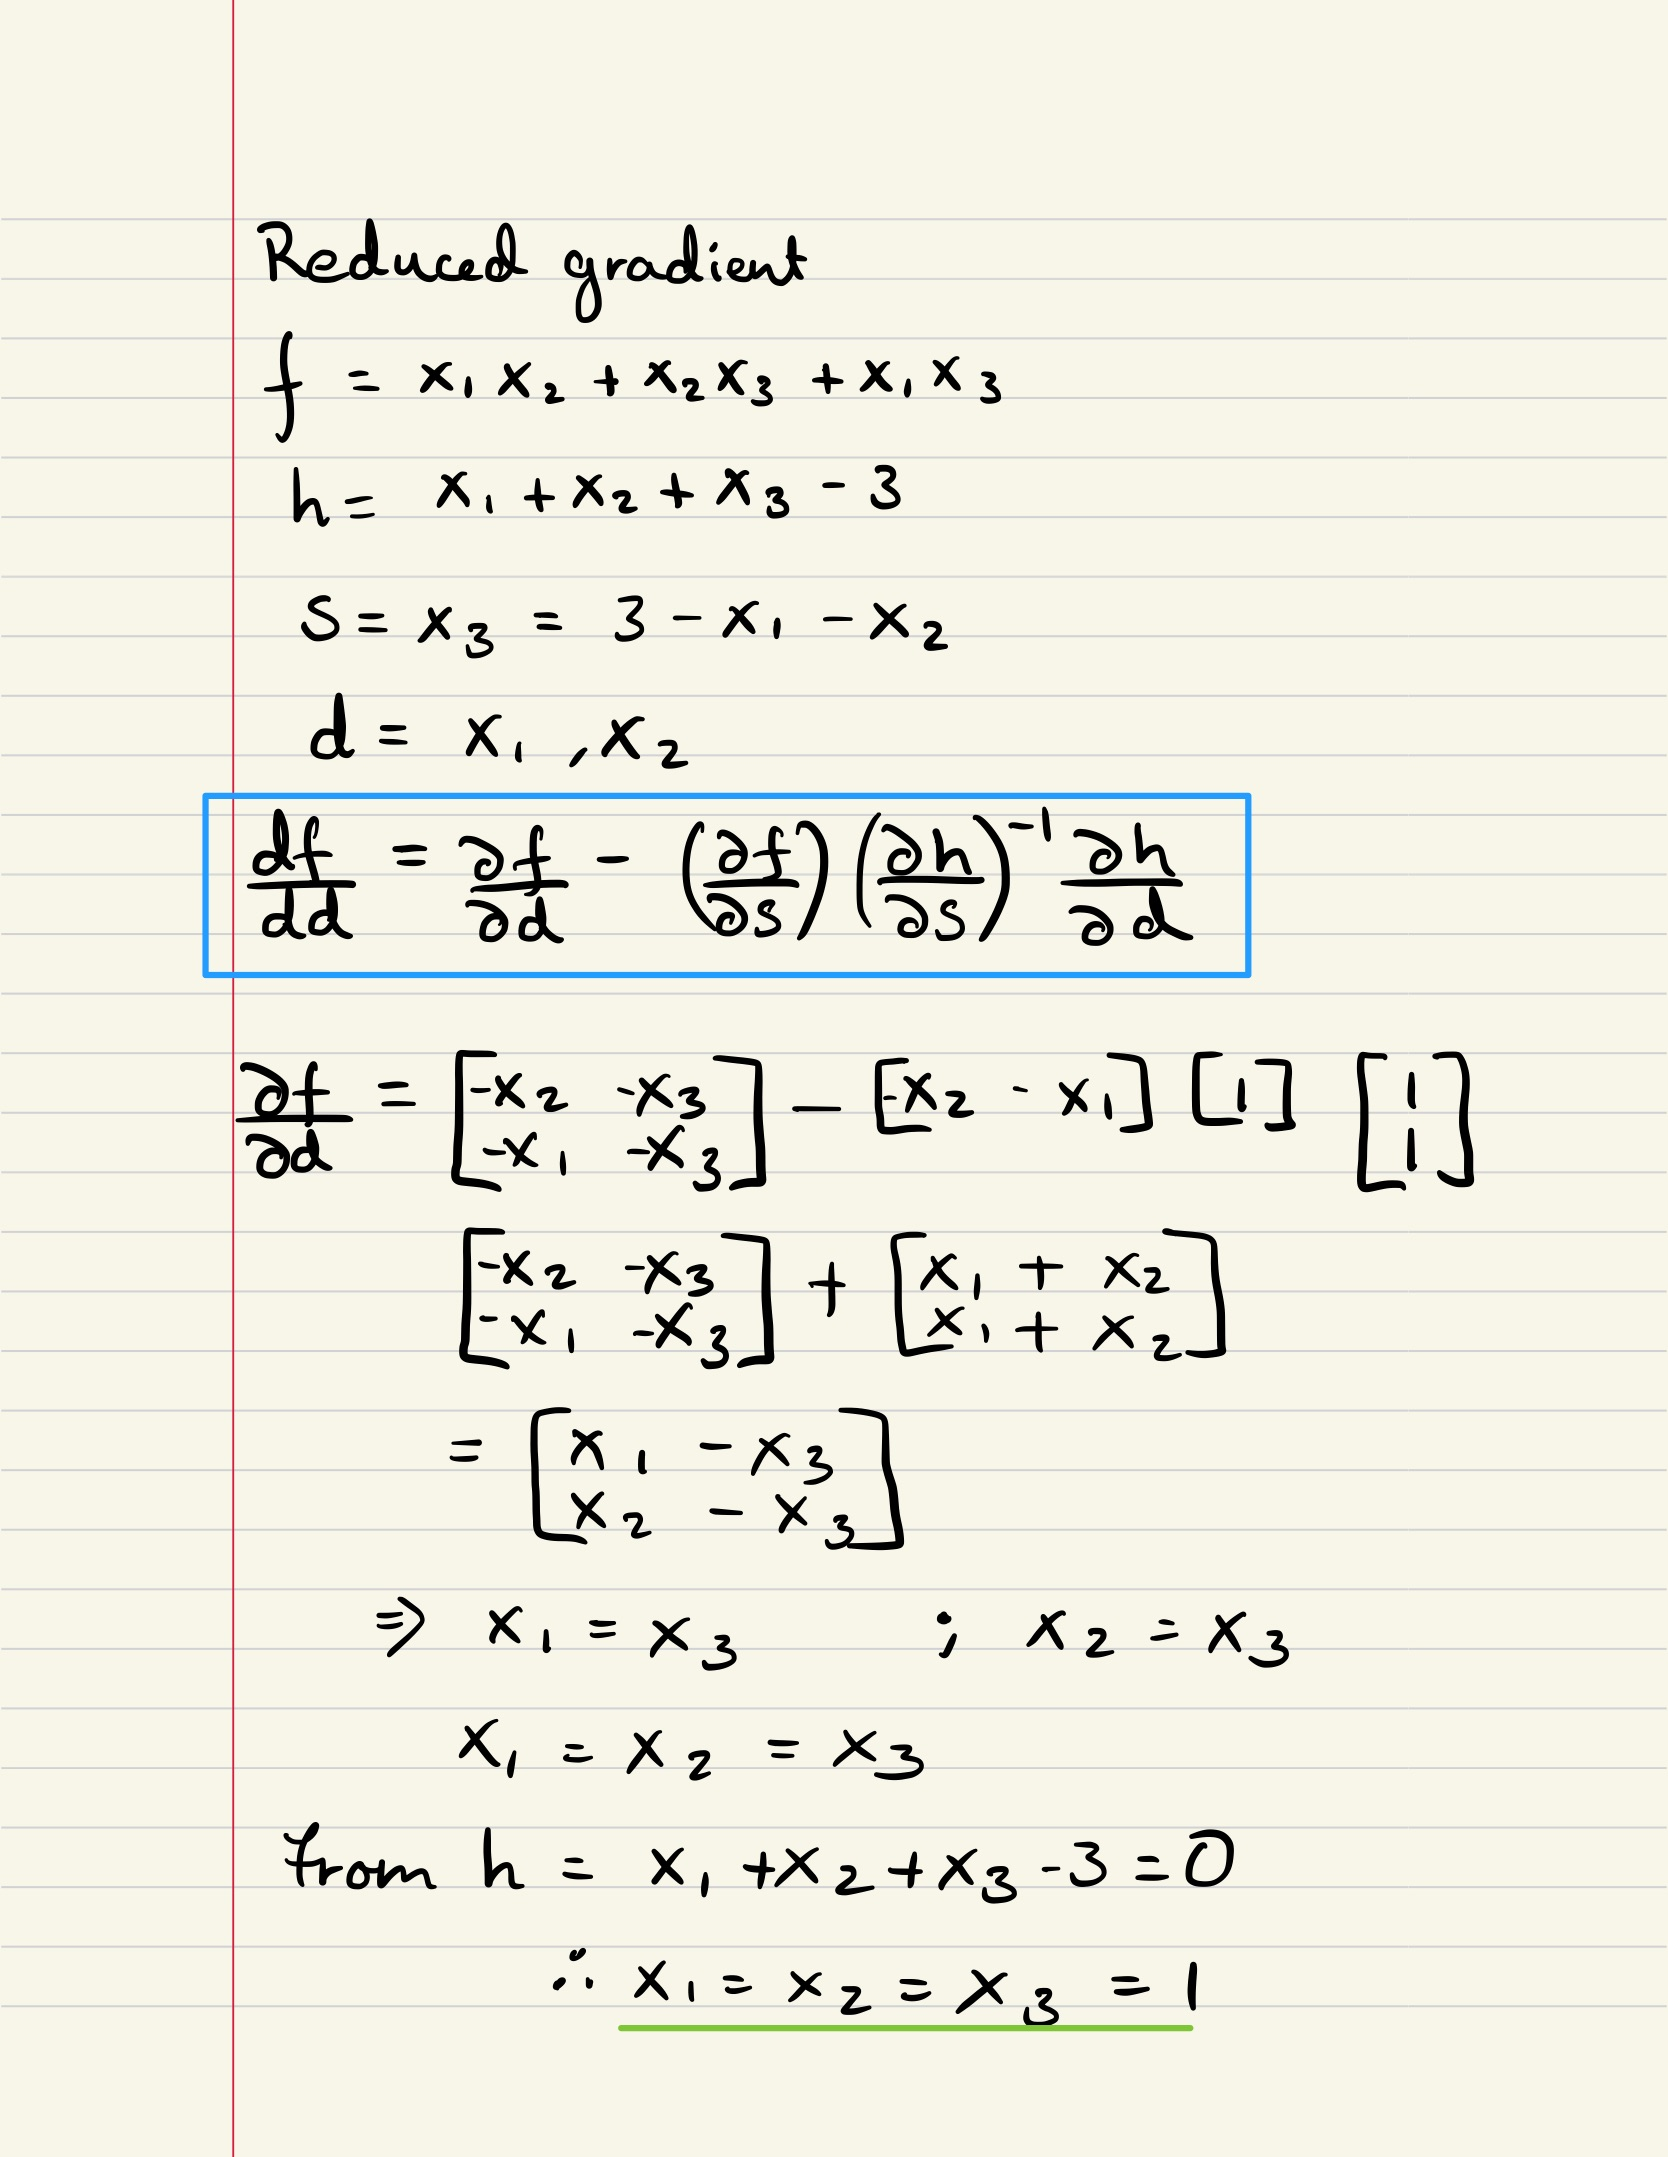

# Problem 4

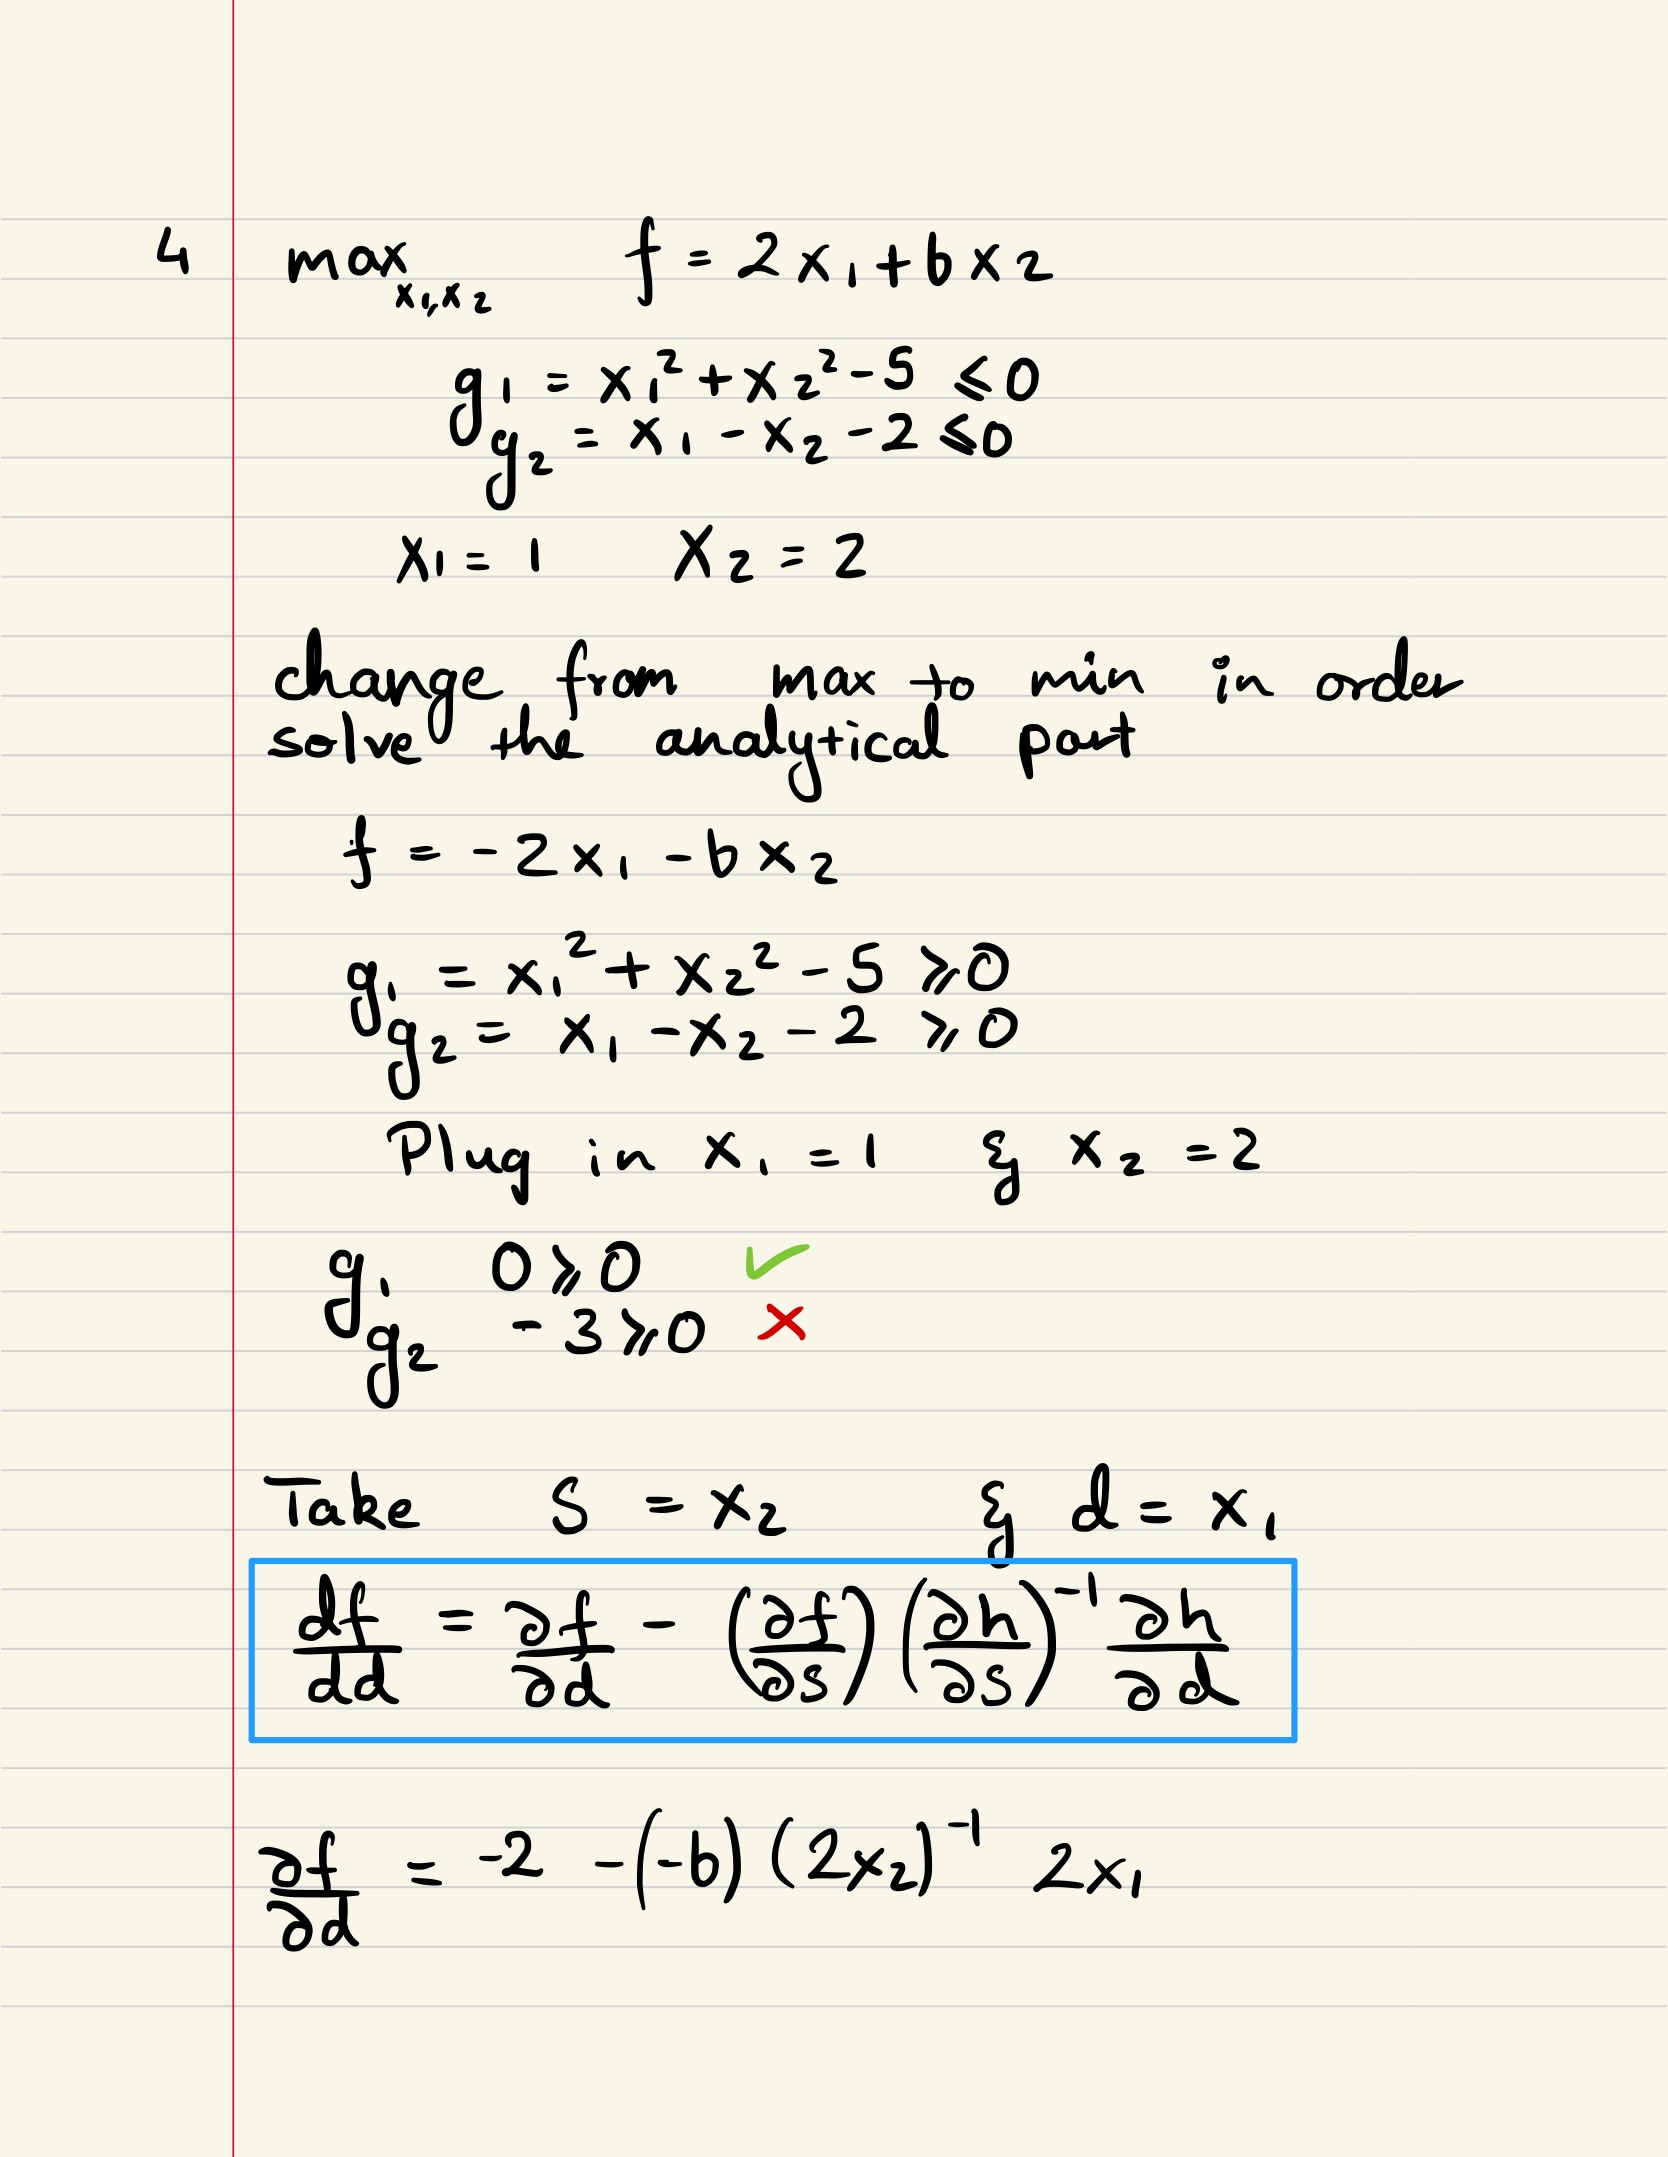

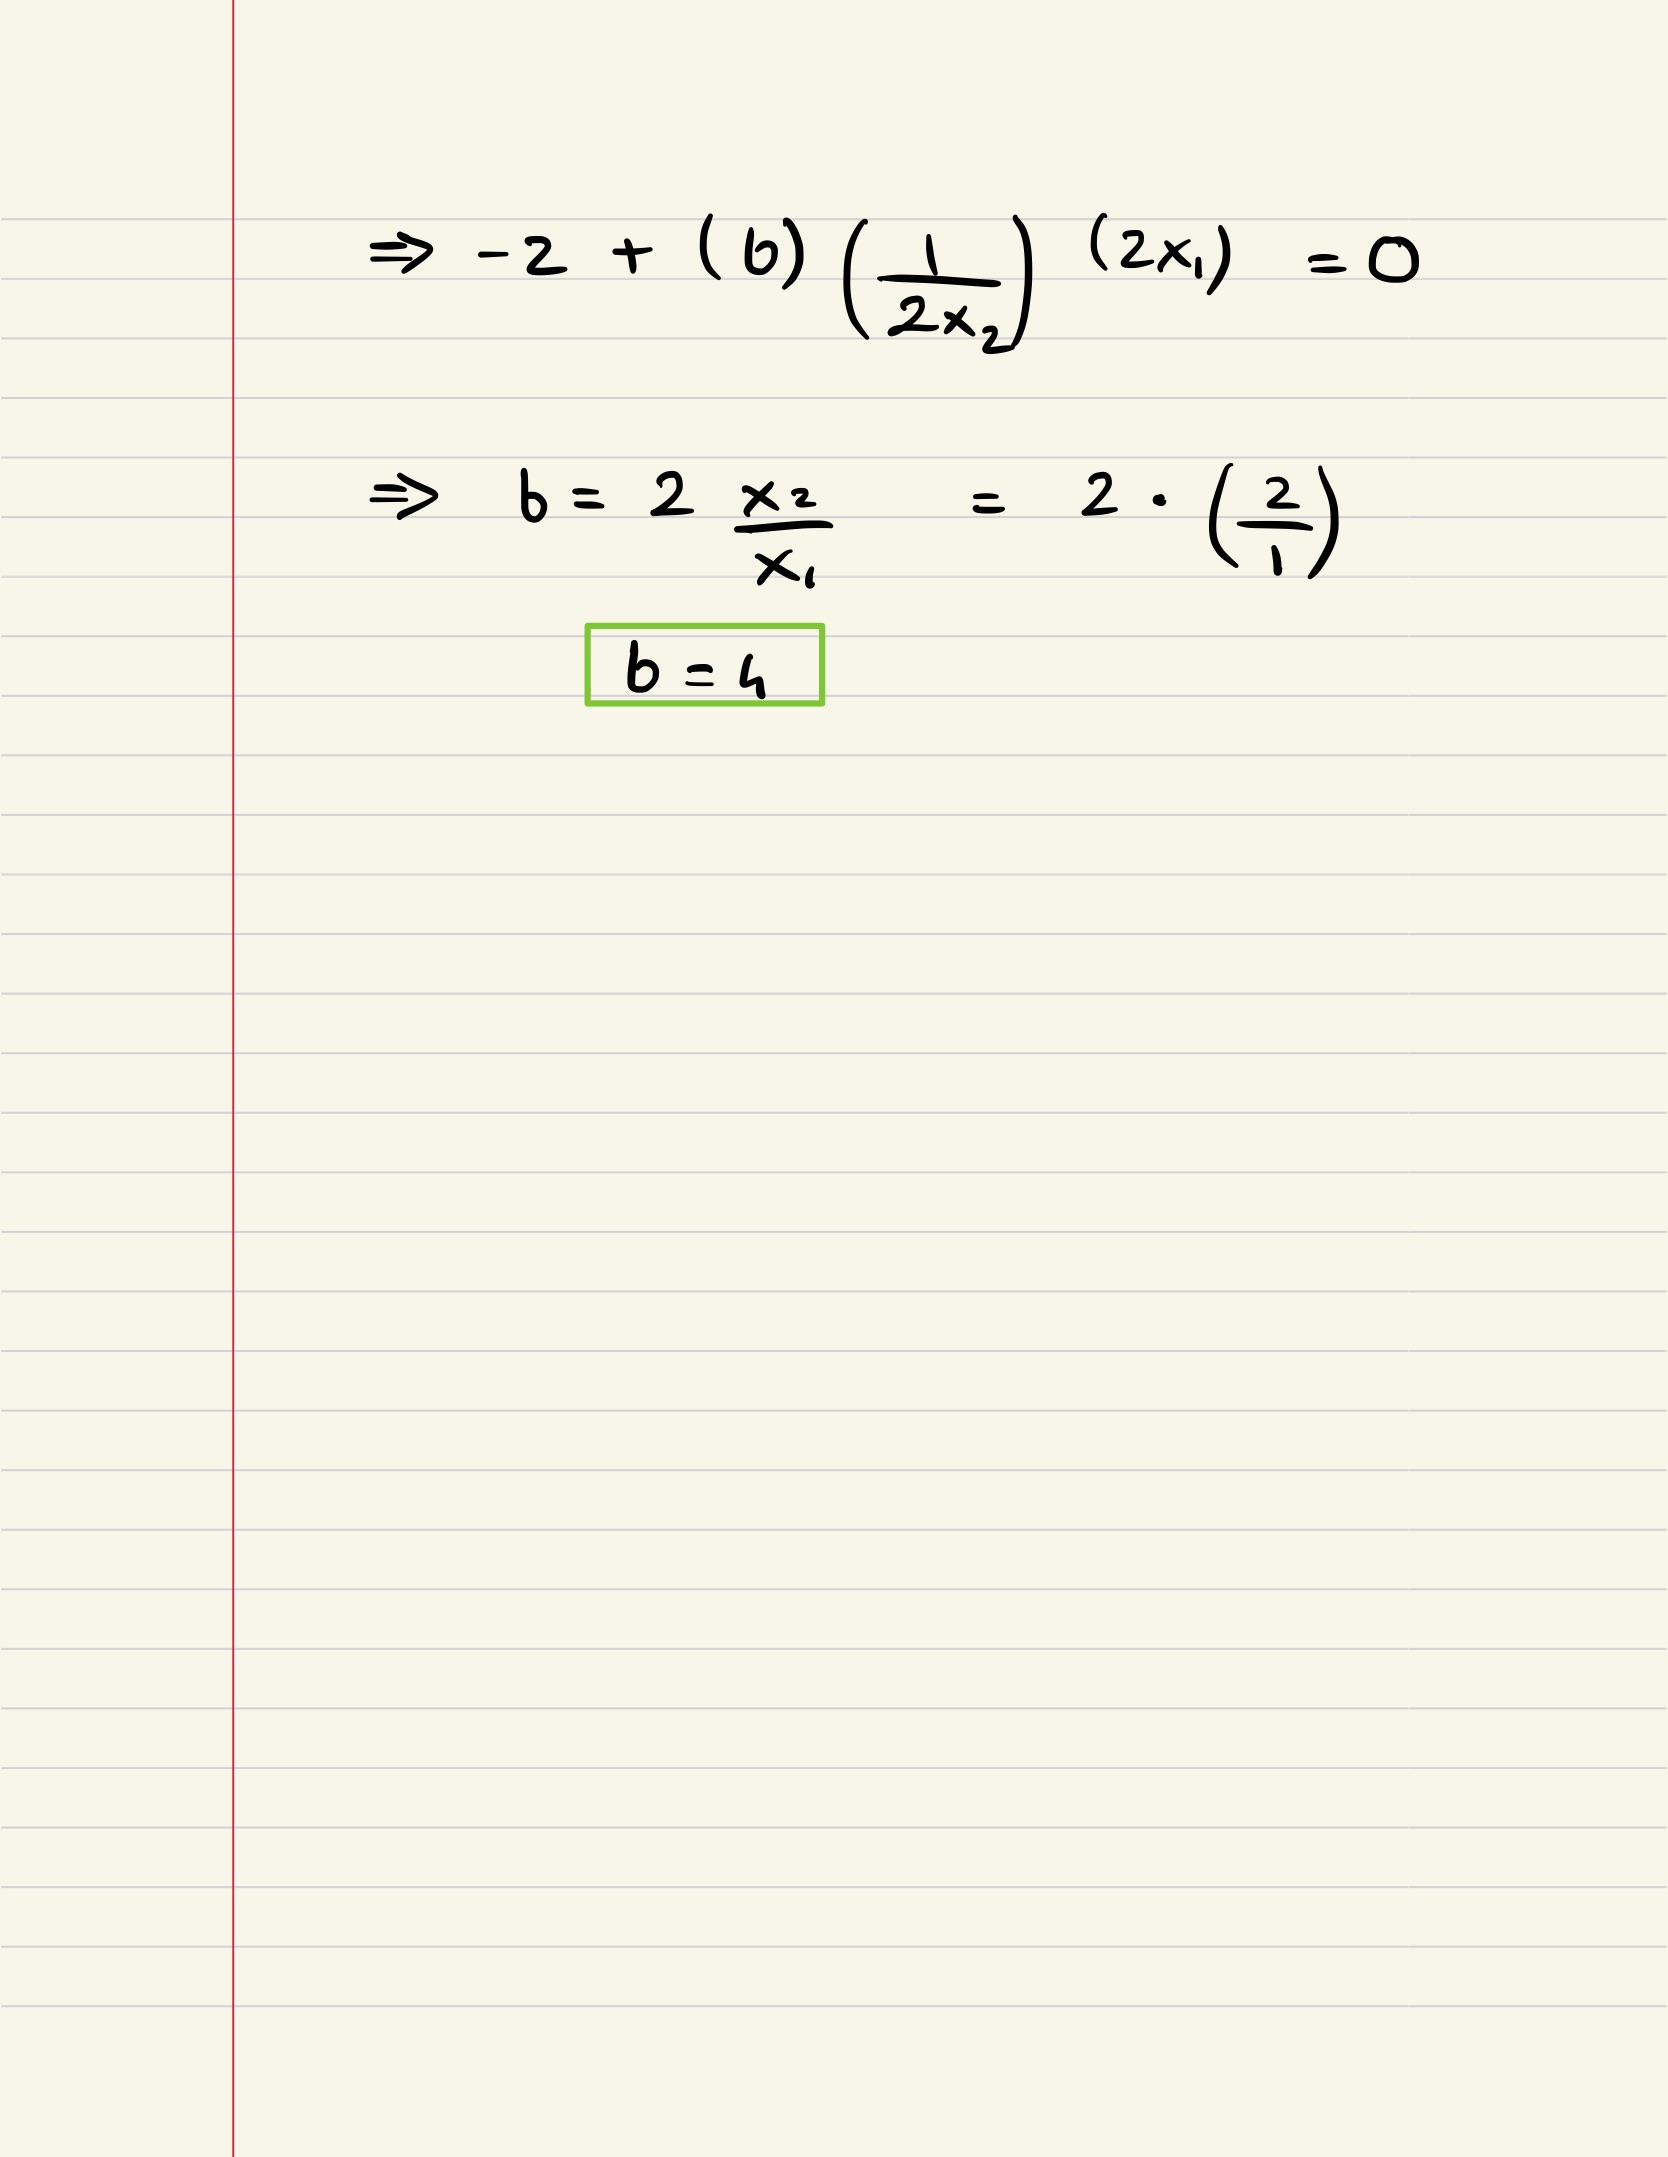

# Problem 5

In [10]:
import numpy as np
import math

def objfun(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    return x1**2+x2**2+x3**2

def fd(x):
    return 2*x[0] 

def fs(x):
    return np.array([2*x[1], 2*x[2]])

def hs(x):
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])

def hd(x):
    return np.array([[x[0]/2],[1]])

def Dfdd(x):  # REDUCED GRAD!
    # This is with x1 = d; x2,x3=s
    return fd(x) - np.matmul( np.matmul(fs(x), np.linalg.inv(hs(x))), hd(x) )

def eval_x(x,a,dfdd): # For the linesearch.
    eval_d= (x[0]-a*dfdd)[0]
    eval_s= x[1:3] + a* np.transpose( np.matmul(  np.matmul(np.linalg.inv(hs(x)) , hd(x) ), np.transpose([Dfdd(x)]) ) )[0]
    return np.append(eval_d,eval_s)

def linesearch(dfdd, x):
    l=1
    m=.7
    n=.89
    while objfun(eval_x(x,l,dfdd)) > (objfun(x) - l*n* dfdd**2):
        l=m*l
    return l

def solve(x): 
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > e: # While |h| > e....
        phs=hs(x)
        s_j_k= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(phs), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ])   ))  # Step 2 of the solve algorithm, but transposing the output.
        x=np.append(x[0:1], np.transpose(s_j_k[0]))
    return x 
        

x1=0
x3= 1/12 * ( (600-170*(x1**2))**(1/2) +10*x1)
x2= x3-x1

x0=np.array([x1, x2, x3])

e=10**(-3)

x_stack=[x0]
error=[]


while np.linalg.norm(Dfdd(x_stack[-1])) > e:
    x=x_stack[-1]
    dfdd=Dfdd(x)
    error.append(math.log(np.linalg.norm(dfdd)))
    a= linesearch(dfdd, x)
    dk= x[0]- a*dfdd
    sk0= x[1:3] + a* np.transpose(  np.matmul(np.matmul(np.linalg.inv(hs(x)), hd(x)),  np.transpose(dfdd)) )
    xk0=np.append(dk,sk0)  
    x = solve(xk0)
    x_stack.append(x)
    
print('Solution' +str(x_stack[-1]))

Solution[-1.57422831  1.37766552 -0.19656279]
